<a href="https://colab.research.google.com/github/Ferdianap/python_for_datascience/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA**

**Link dataset :** https://www.kaggle.com/datasets/yakubianacolyte/dataset-penjualan-sepeda-motor-bekas

Dataset ini berisi informasi tentang sepeda motor bekas, yang terdiri dari atribut seperti model, tahun, harga, transmisi, odometer, jenis, pajak, konsumsi bahan bakar, dan kapasitas mesin.

 **Tujuan** : Dataset akan digunakan untuk membangun model clustering menggunakan K-means agar dapat mengelompokkan sepeda motor ke dalam beberapa grup berdasarkan karakteristiknya(harga,tahun, odometer, dan mesin)

# Load Data

In [ ]:
import pandas as pd

file_path = '/content/motor_second.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,Supra X 125,2017,7999,Manual,17307,Bebek,145.0,58.9,125.0
1,Vario 125,2016,14499,Automatic,25233,Skuter,235.0,43.5,125.0
2,Vario 125,2016,11399,Automatic,37877,Skuter,30.0,61.7,125.0
3,Revo,2016,6499,Manual,23789,Bebek,20.0,60.1,110.0
4,PCX,2015,10199,Automatic,33177,Skuter,160.0,51.4,150.0


# Data Understanding

In [ ]:
data.shape

(199, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model        199 non-null    object 
 1   tahun        199 non-null    int64  
 2   harga        199 non-null    int64  
 3   transmisi    199 non-null    object 
 4   odometer     199 non-null    int64  
 5   jenis        199 non-null    object 
 6   pajak        199 non-null    float64
 7   konsumsiBBM  199 non-null    float64
 8   mesin        198 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 14.1+ KB


In [ ]:
data.dtypes.value_counts()

,count
object,3
int64,3
float64,3


In [ ]:
data.describe()

,tahun,harga,odometer,pajak,konsumsiBBM,mesin
count,199.000000,199.000000,199.000000,199.000000,199.000000,198.000000
mean,2016.618090,11385.015075,23468.306533,110.395477,53.905528,123.914141
std,1.712955,4534.671984,15689.247247,63.600019,11.819869,16.821177
min,2011.000000,3799.000000,1391.000000,0.000000,28.000000,0.000000
25%,2016.000000,7996.500000,12696.000000,30.000000,44.800000,110.000000
50%,2017.000000,10998.000000,21119.000000,145.000000,56.500000,125.000000
75%,2018.000000,14498.500000,32103.000000,145.000000,60.100000,125.000000
max,2019.000000,34998.000000,119050.000000,300.000000,125.000000,150.000000


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Distribusi Tahun

<ipython-input-17-5392a12273c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="tahun", palette="viridis")


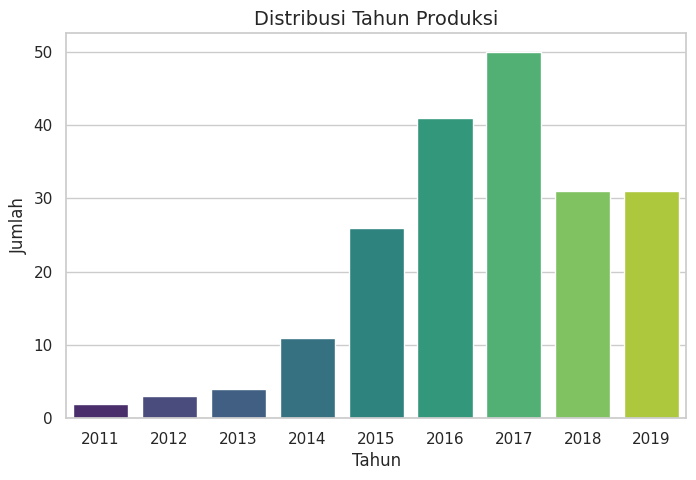

In [ ]:
# Distribusi Tahun
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="tahun", palette="viridis")
plt.title("Distribusi Tahun Produksi", fontsize=14)
plt.ylabel("Jumlah")
plt.xlabel("Tahun")
plt.show()

Interprestasi : Sebagian besar sepeda motor hadir pada tahun 2016 hingga 2018, dengan puncaknya di 2017

## Distribusi Harga

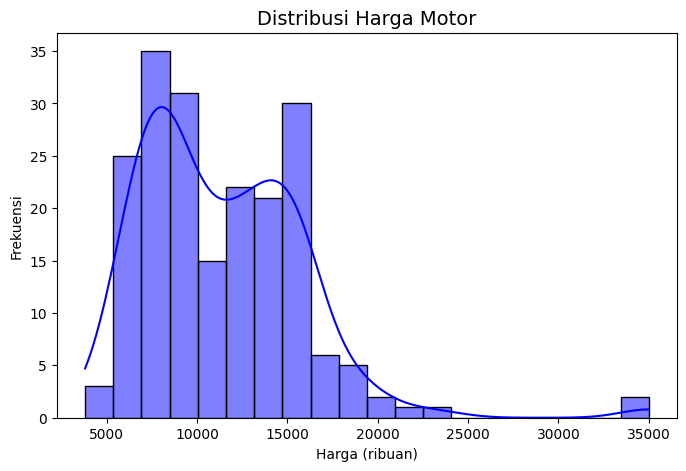

In [ ]:
# Distribusi Harga
plt.figure(figsize=(8, 5))
sns.histplot(data["harga"], kde=True, color="blue", bins=20)
plt.title("Distribusi Harga Motor", fontsize=14)
plt.xlabel("Harga (ribuan)")
plt.ylabel("Frekuensi")
plt.show()

Interprestasi : Harga sepeda motor cenderung terdistribusi secara normal, dengan banyak motor di kisaran harga 7.000.000–15.000.000.

## Hubungan Odometer dan Harga

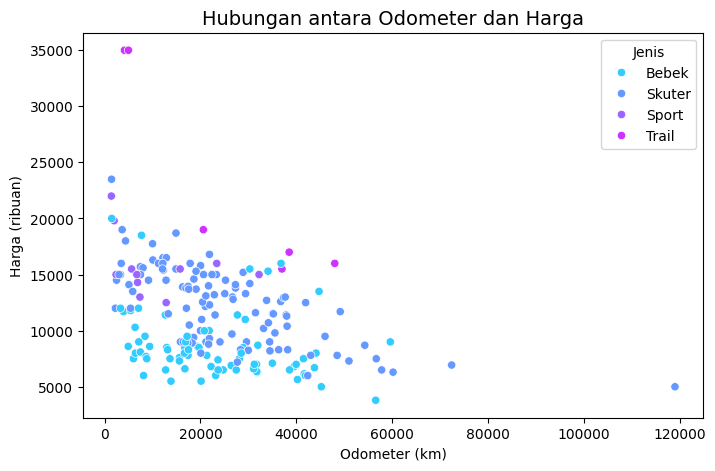

In [ ]:
# Hubungan Odometer dan Harga
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="odometer", y="harga", hue="jenis", palette="cool")
plt.title("Hubungan antara Odometer dan Harga", fontsize=14)
plt.xlabel("Odometer (km)")
plt.ylabel("Harga (ribuan)")
plt.legend(title="Jenis")
plt.show()

Hubungan Odometer dan Harga:

- Harga cenderung menurun seiring bertambahnya jarak tempuh (odometer).

- Sepeda motor jenis Skuter mendominasi, tetapi tidak memiliki hubungan harga dan jarak tempuh yang signifikan berbeda dari tipe lainnya.

## Distribusi Konsumsi BBM berdasarkan Transmisi

<ipython-input-12-c15766bb11b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="transmisi", y="konsumsiBBM", palette="Set2")


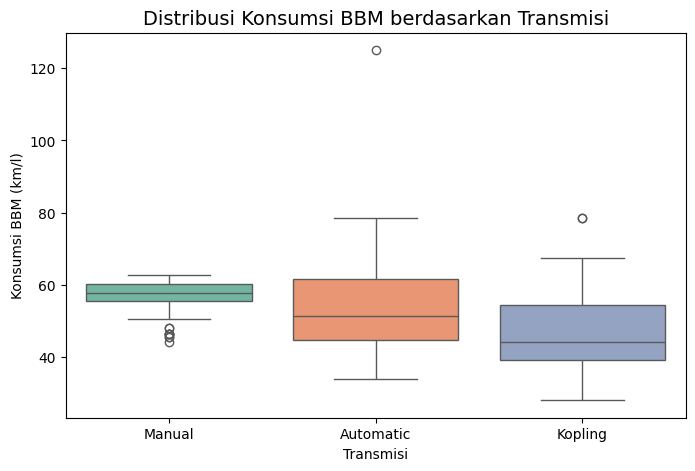

In [ ]:
# Distribusi Konsumsi BBM berdasarkan Transmisi
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="transmisi", y="konsumsiBBM", palette="Set2")
plt.title("Distribusi Konsumsi BBM berdasarkan Transmisi", fontsize=14)
plt.xlabel("Transmisi")
plt.ylabel("Konsumsi BBM (km/l)")
plt.show()

## Korelasi antar fitur numerik

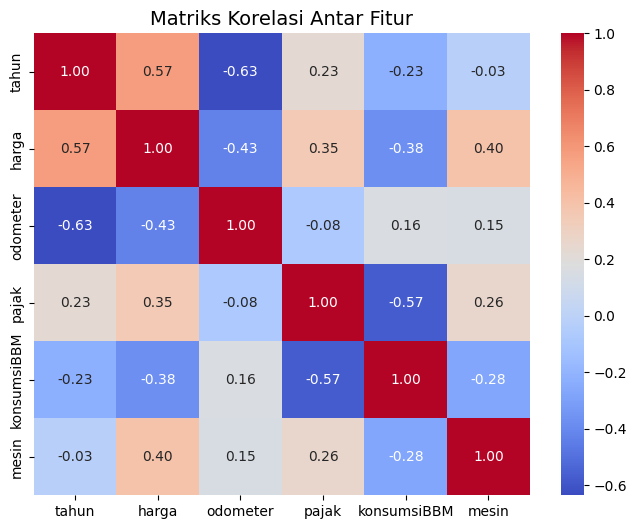

In [ ]:
# Korelasi antar fitur numerik
plt.figure(figsize=(8, 6))

# Hanya kolom numerik
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Antar Fitur", fontsize=14)
plt.show()

## Distribusi Pajak

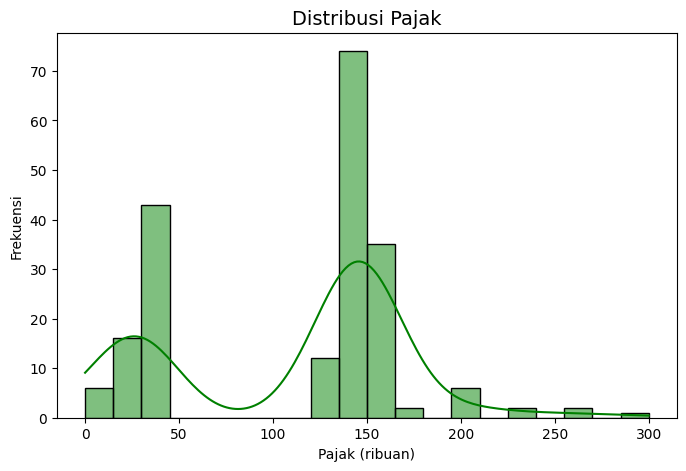

In [ ]:
# Distribusi Pajak
plt.figure(figsize=(8, 5))
sns.histplot(data["pajak"], kde=True, color="green", bins=20)
plt.title("Distribusi Pajak", fontsize=14)
plt.xlabel("Pajak (ribuan)")
plt.ylabel("Frekuensi")
plt.show()

Interprestasi : Pajak sebagian besar berada pada nilai 30.000–145.000 ribu, tetapi ada beberapa outlier pada nilai lebih tinggi.

# Feature Engineering

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Cek Missing Value

In [ ]:
# cek missing value
data.isnull().sum()

,0
model,0
tahun,0
harga,0
transmisi,0
odometer,0
jenis,0
pajak,0
konsumsiBBM,0
mesin,1


## Mengatasi Nilai Kosong

In [ ]:
# Mengatasi nilai kosong
data["mesin"].fillna(data["mesin"].median(), inplace=True)

<ipython-input-23-b384f44b9678>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["mesin"].fillna(data["mesin"].median(), inplace=True)


## One-Hot Encoding untuk Kolom Kategorikal

In [ ]:
# One-Hot Encoding untuk kolom kategorikal
categorical_columns = ["transmisi", "jenis"]
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

## Normalisasi Fitur Numerik

In [ ]:
# Normalisasi fitur numerik
numerical_columns = ["tahun", "harga", "odometer", "pajak", "konsumsiBBM", "mesin"]

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

## Menghilangkan Outlier pada Kolom 'Pajak'

In [ ]:
# Menghilangkan outlier pada kolom 'pajak'
Q1 = data_encoded["pajak"].quantile(0.25)
Q3 = data_encoded["pajak"].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (data_encoded["pajak"] < (Q1 - 1.5 * IQR)) | (data_encoded["pajak"] > (Q3 + 1.5 * IQR))
data_cleaned = data_encoded[~outlier_condition]

## Menambahkan Kolom Baru 'Umur'

In [ ]:
# Menambahkan kolom baru 'umur'
data_cleaned["umur"] = 2024 - ((data_cleaned["tahun"] * (2019 - 2011)) + 2011)

In [ ]:
data_cleaned.head()

,model,tahun,harga,odometer,pajak,konsumsiBBM,mesin,transmisi_Kopling,transmisi_Manual,jenis_Skuter,jenis_Sport,jenis_Trail,umur
0,Supra X 125,0.750,0.134620,0.135272,0.483333,0.318557,0.833333,False,True,False,False,False,7.0
1,Vario 125,0.625,0.342960,0.202636,0.783333,0.159794,0.833333,False,False,True,False,False,8.0
2,Vario 125,0.625,0.243598,0.310100,0.100000,0.347423,0.833333,False,False,True,False,False,8.0
3,Revo,0.625,0.086541,0.190364,0.066667,0.330928,0.733333,False,True,False,False,False,8.0
4,PCX,0.500,0.205135,0.270154,0.533333,0.241237,1.000000,False,False,True,False,False,9.0


# Modeling (K-Means)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Mencari jumlah cluster optimal menggunakan metode Elbow
sse = []
cluster_range = range(2, 11)

numerical_features = data_cleaned.select_dtypes(include=['number'])

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_features)
    sse.append(kmeans.inertia_)

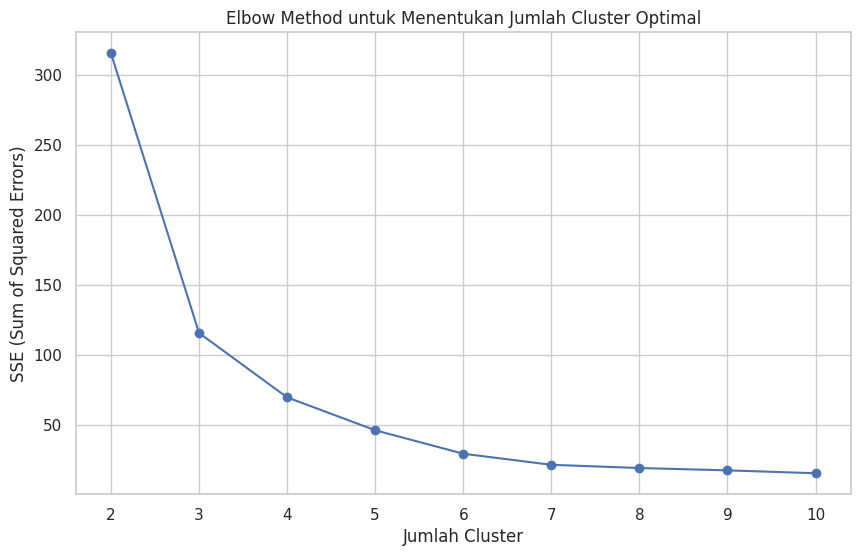

In [ ]:
# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, sse, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

Berdasarkan grafik Elbow Method, jumlah cluster optimal untuk model K-means adalah 3 cluster, karena setelah titik ini (3 cluster), penurunan nilai Sum of Squared Errors (SSE) melambat secara signifikan. Model ini akan mengelompokkan data sepeda motor ke dalam tiga kelompok utama berdasarkan kesamaan fitur.

In [ ]:
# Menggunakan jumlah cluster optimal (misal 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

numerical_features = data_cleaned.select_dtypes(include=['number'])

data_cleaned["cluster"] = kmeans.fit_predict(numerical_features)

# Evaluasi

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Menggunakan Silhouette Score untuk mengevaluasi kualitas cluster
silhouette_avg = silhouette_score(data_cleaned.select_dtypes(include=['number']), data_cleaned["cluster"])  # Select only numerical features
print(f"Silhouette Score untuk {optimal_k} cluster: {silhouette_avg:.2f}")

Silhouette Score untuk 3 cluster: 0.67


Silhouette Score: Nilai sebesar 0.67 yang menunjukkan bahwa clustering cukup baik.

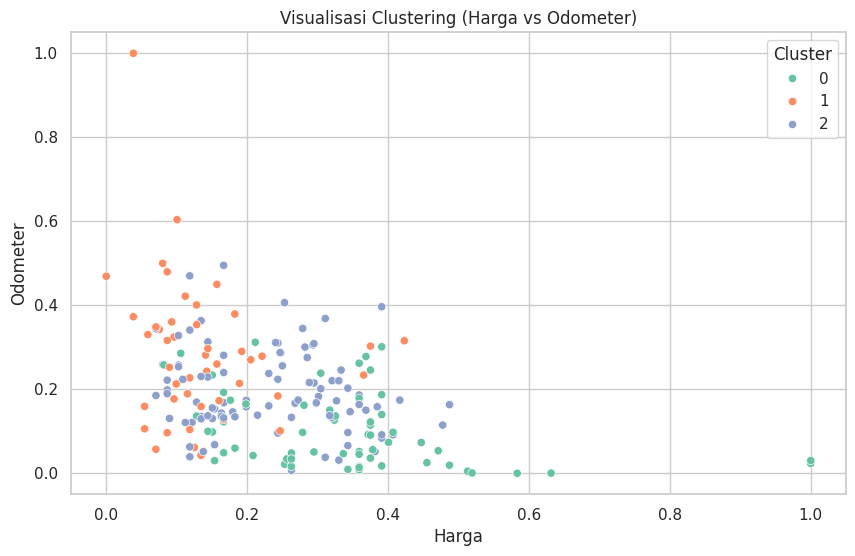

In [ ]:
# Visualisasi hasil clustering (dua fitur utama)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned["harga"], y=data_cleaned["odometer"], hue=data_cleaned["cluster"], palette="Set2")
plt.title('Visualisasi Clustering (Harga vs Odometer)')
plt.xlabel('Harga')
plt.ylabel('Odometer')
plt.legend(title='Cluster')
plt.show()

Scatter plot menunjukkan hasil clustering dengan memplotkan harga (sumbu X) dan odometer (sumbu Y) untuk setiap data, dengan warna berbeda untuk masing-masing cluster:

- Cluster 0 (warna oranye): Terlihat di bagian bawah grafik, cenderung memiliki harga rendah dan odometer rendah hingga sedang.
- Cluster 1 (warna hijau): Tersebar di bagian tengah, dengan harga sedang dan odometer sedang hingga tinggi.
- Cluster 2 (warna biru): Terletak di bagian bawah kiri, dengan harga tinggi dan odometer sangat rendah.

In [ ]:
# Interpretasi
for cluster in range(optimal_k):
    cluster_data = data_cleaned[data_cleaned["cluster"] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data.describe())

Cluster 0:
          tahun      harga   odometer      pajak  konsumsiBBM      mesin  \
count  62.00000  62.000000  62.000000  62.000000    62.000000  62.000000   
mean    0.93750   0.340121   0.103044   0.480844     0.201247   0.834946   
std     0.06301   0.168453   0.090897   0.046782     0.156246   0.149123   
min     0.87500   0.081765   0.000000   0.129000     0.000000   0.000000   
25%     0.87500   0.249183   0.030070   0.483333     0.075258   0.733333   
50%     0.93750   0.358954   0.073450   0.483333     0.173196   0.833333   
75%     1.00000   0.387745   0.159044   0.500000     0.250515   1.000000   
max     1.00000   1.000000   0.311842   0.500000     1.000000   1.000000   

            umur  cluster  
count  62.000000     62.0  
mean    5.500000      0.0  
std     0.504082      0.0  
min     5.000000      0.0  
25%     5.000000      0.0  
50%     5.500000      0.0  
75%     6.000000      0.0  
max     6.000000      0.0  
Cluster 1:
           tahun      harga   odometer   

1. Cluster 0
- Tahun: Nilai rata-rata 0.94, menunjukkan bahwa motor dalam cluster ini adalah yang relatif baru.
- Harga: Rata-rata 0.34, yang artinya motor ini termasuk dalam kategori murah.
- Odometer: Rata-rata 0.10, menunjukkan bahwa motor ini memiliki jarak tempuh yang sangat rendah.
- Pajak: Rata-rata 0.48, cukup tinggi dibanding cluster lainnya.
- Konsumsi BBM: Rata-rata 0.20, yang berarti motor ini kurang efisien dalam konsumsi bahan bakar.
- Mesin: Rata-rata 0.83, artinya motor ini memiliki mesin yang besar.
- Umur: Rata-rata 5.5 tahun, relatif baru dibandingkan cluster lainnya.

Interpretasi:
Cluster 0 berisi motor harga menegah, memiliki jarak tempuh rendah, dengan mesin besar dan relatif baru. Cocok untuk pembeli yang ingin motor terjangkau tetapi dengan performa baik dan jarak tempuh sedikit.

2. Cluster 1
- Tahun: Nilai rata-rata 0.40, menunjukkan bahwa motor dalam cluster ini adalah yang relatif lama.
- Harga: Rata-rata 0.14, yang artinya motor ini termasuk dalam kategori sangat murah.
- Odometer: Rata-rata 0.29, menunjukkan bahwa motor ini memiliki jarak tempuh sedang.
- Pajak: Rata-rata 0.33, cukup rendah dibandingkan cluster lainnya.
- Konsumsi BBM: Rata-rata 0.27, menunjukkan efisiensi bahan bakar yang rendah.
- Mesin: Rata-rata 0.85, artinya motor ini memiliki mesin yang besar.
- Umur: Rata-rata 9.78 tahun, termasuk tua dibandingkan cluster lainnya.

Interpretasi:
Cluster 1 berisi motor yang harga rendah tetapi sudah tua dengan jarak tempuh sedang, cocok untuk pembeli dengan anggaran terbatas yang tidak memprioritaskan performa atau usia kendaraan.

3. Cluster 2
- Tahun: Nilai rata-rata 0.69, menunjukkan bahwa motor dalam cluster ini adalah yang relatif menengah dalam usia.
- Harga: Rata-rata 0.23, motor ini memiliki harga yang menengah dibandingkan cluster lainnya.
- Odometer: Rata-rata 0.19, menunjukkan jarak tempuh yang rendah-sedang.
- Pajak: Rata-rata 0.31, menunjukkan biaya pajak yang rendah-menengah.
- Konsumsi BBM: Rata-rata 0.31, artinya motor ini cukup hemat bahan bakar.
- Mesin: Rata-rata 0.81, menunjukkan motor dengan mesin besar.
- Umur: Rata-rata 7.45 tahun, termasuk usia menengah.

Interpretasi:
Cluster 2 mencerminkan motor dengan harga tinggi, jarak tempuh rendah hingga sedang, dan usia relatif moderat. Cocok untuk pembeli yang mencari keseimbangan antara harga, usia, dan performa.

# Kesimpulan

- **Cluster 0** : Motor harga menegah dan relatif baru dengan jarak tempuh rendah, cocok untuk pembeli hemat tetapi tetap ingin motor baru.

- **Cluster 1** : Motor harga rendah tetapi usia tua dengan jarak tempuh sedang, cocok untuk pembeli anggaran rendah.

- **Cluster 2** : Motor dengan harga tinggi dan usia menegah, dengan performa dan jarak tempuh yang cukup baik, cocok untuk pembeli yang mencari keseimbangan.